In [32]:
from PIL import Image, ImageFont, ImageDraw
from functools import reduce
import numpy as np
from matplotlib import pyplot as plt

In [33]:
font_size = 69

phrase = "если жена мешает преферансу бросай жену"
font = ImageFont.truetype("font/CaskaydiaMonoNerdFont-Regular.ttf", font_size)

width = reduce(
    lambda acc, curr: acc + curr,
    map(lambda symbol: font.getbbox(symbol)[2], phrase),
    0)

height = max(map(lambda symbol: font.getbbox(symbol)[3], phrase))

width_padding = 60
height_padding = 20

image = Image.new("L", (width + width_padding, height + height_padding), color="white")
draw = ImageDraw.Draw(image)
draw.text((width_padding // 2, height_padding // 2), phrase, font=font, color="black")
image.save("phrase.bmp")

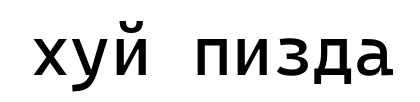

In [34]:
image = Image.open("phrase.bmp")
image

In [35]:
image_array = np.array(image)

In [36]:
bd_image = 1 - image_array / 255

In [37]:
horizontal_profile = bd_image.sum(axis=1)
vertical_profile = bd_image.sum(axis=0)

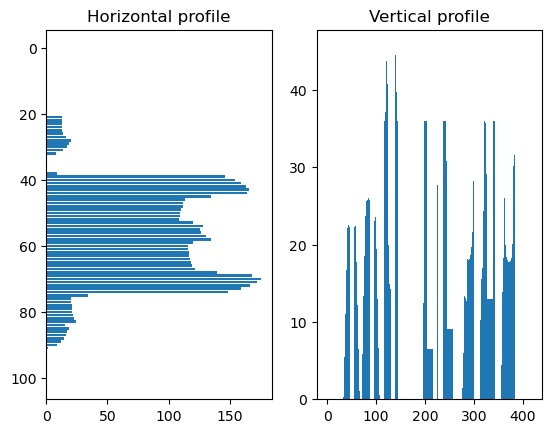

In [38]:
graph, (horizontal, vertical) = plt.subplots(1, 2)

vertical.bar(range(vertical_profile.size), vertical_profile)
vertical.set_title("Vertical profile")

horizontal.barh(range(horizontal_profile.size), horizontal_profile)
horizontal.invert_yaxis()
horizontal.set_title("Horizontal profile")

plt.show()

In [39]:
boxes = []

l = 0

while l < vertical_profile.size:
    while l < vertical_profile.size and vertical_profile[l] == 0:
        l += 1

    r = l

    while r < vertical_profile.size and vertical_profile[r] != 0:
        r += 1
    
    if (l != r):
        boxes.append((l - 1, r))

    l = r

filtered_boxes = []

for box in boxes:
    if len(filtered_boxes) == 0:
        filtered_boxes.append(box)
        continue

    if (box[0] - filtered_boxes[-1][1] < 3):
        filtered_boxes[-1] = (filtered_boxes[-1][0], box[1])
    else:
        filtered_boxes.append(box)

In [40]:
top = 0
bottom = 0

for i in range(horizontal_profile.size):
    if horizontal_profile[i] != 0:
        bottom = i
        break

for i in range(horizontal_profile.size - 1, -1, -1):
    if (horizontal_profile[i] != 0):
        top = i
        break

top, bottom

(91, 21)

In [41]:
boxed_image = Image.open("phrase.bmp")
draw = ImageDraw.Draw(boxed_image)

height

for box in filtered_boxes:
    x1, x2 = box
    l_line = [(x1, bottom), (x1, top)]
    r_line = [(x2, bottom), (x2, top)]
    top_line = [(x1, top), (x2, top)]
    bottom_line = [(x1, bottom), (x2, bottom)]


    draw.line(l_line, fill=(0), width=1)
    draw.line(r_line, fill=(0), width=1)
    draw.line(bottom_line, fill=(0), width=1)
    draw.line(top_line, fill=(0), width=1)

boxed_image.show()